# Euler's Method

**References:**

- Sections 6.1.1 *Euler's Method* in {cite}`Sauer`.
- Section 5.2 *Euler's Method* in {cite}`Burden-Faires`.
- Sections 7.1 and 7.2 in {cite}`Chenney-Kincaid`.

In [1]:
using PyPlot

## Examples

A lot of useful intuition comes from the first four examples in 
{doc}`the chapter introduction <ODE-IVPs>`:
- {prf:ref}`ode-integration` $\displaystyle du/dt = f(t)$ (Integration),
- {prf:ref}`ode-simplest-genuine` $\displaystyle du/dt = k u$ (the simplest "genuine" ODE),
- {prf:ref}`ode-nonlinear` $\displaystyle du/dt = u^2$ (a nonlinear ODE)
and
- {prf:ref}`ode-stiff` $\displaystyle du/dt = -\sin t -k(u - \cos t)$ (with fast and slow time scales).

<a name="eulers-method"></a>
## The Tangent Line Method, a.k.a. Euler's Method

Once we know $u(t)$ (or a good approx4imation) at some time $t$, we also know the value of $u'(t) = f(t, u(t))$ there; in particular, we know that $u(a) = u_0$ and so $u'(a) = f(a, u_0)$.

This allows us to approx4imate $u$ for slightly larger values of the argument (which I will call "time") using its tangent line:

$$ u(a+h) \approx4 u(a) + u'(a) h = u_0 + f(a, u_0) h  \text{ for "small" $h$} $$

and more generally

$$ u(t+h) \approx4 u(t) + f(t, u(t)) h \text{ for "small" $h$} $$

This leads to the simplest approx4imation: choose a step size $h$ determining equally spaced times $t_i = a + i h$ and define — recursively — a sequence of approx4imations $U_i \approx4 u(t_i)$ with

$$\begin{split}
U_0 &= u_0
\\
U_{i+1} &= U_i + h f(t_i, U_i))
\end{split}$$

If we choose a number of time steps $n$ and set $h = (b-a)/n$ for $0 \leq i \leq n$,
the second equation is needed for $0 \leq i < n$, ending with $U_n \approx4 u(t_n) = u(b)$.

This "two-liner" does not need a pseudo-code description; instead, we can go directly to a rudimentary Julia function for Euler's Method:

In [2]:
function eulermethod(f, a, b, u_0, n)
    # Solve du/dt = f(t, u) for t in [a, b], with initial value u(a) = u_0
    
    h = (b-a)/n
    t = range(a, b, n+1)  # Note: "n" counts steps, so there are n+1 values for t.
    u = zeros(n+1)
    u[1] = u_0
    for i in 1:n
        u[i+1] = u[i] + f(t[i], u[i])*h
    end
    return (t, u)
end;

See [Exercise 1](#exercise-1).

### Solving for {prf:ref}`ode-integration`, an integration

In [3]:
# For integration of -sin(t): The exact solution is cos(t) + u_0
f1(t, u) = -sin(t);
u1(t, a, u_0) = cos(t) + (u_0 - cos(a));

In [4]:
# A helper function for rounding some output to four significant digits
approx4(x) = round(x, sigdigits=4);

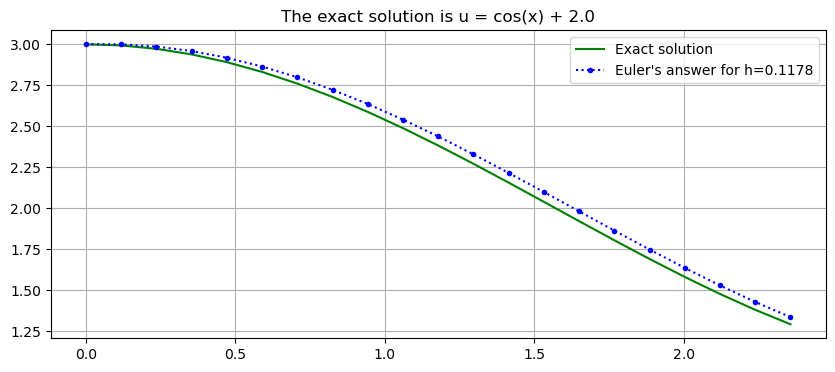

In [5]:
a = 0.0
b = 3/4*pi
u_0 = 3.0
n = 20

(t, U) = eulermethod(f1, a, b, u_0, n)  
u = u1.(t, a, u_0)

figure(figsize=[10,4])
title("The exact solution is u = cos(x) + $(u_0 - 1)")
plot(t, u, "g", label="Exact solution")
plot(t, U, ".:b", label="Euler's answer for h=$(approx4((b-a)/n))")
legend()
grid(true)

### Solving for {prf:ref}`ode-simplest-genuine`, some exponential functions

In [6]:
# For solving du/dt = k u: The exact solution is u_0 exp(k t).
f2(t, u) = k*u;
# The parameter k may be defined later, so long as that is done before this functions are used.
u2(t, a, u_0, k) = u_0 * exp(k*(t-a));

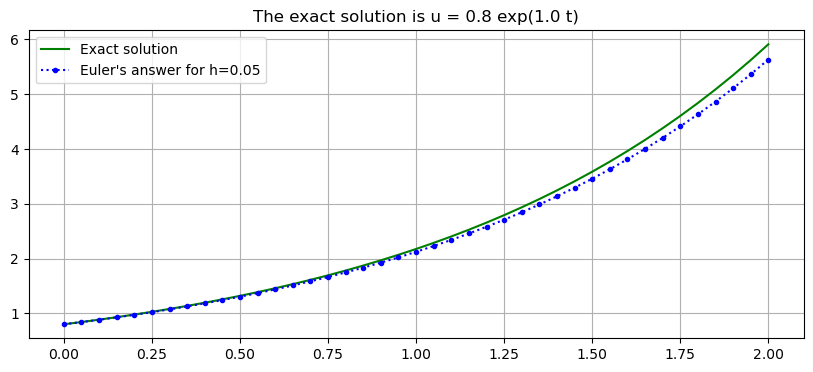

In [7]:
# You could experiment by changing these values here;
# for now I instead redefine them below.
k = 1.0
u_0 = 0.8
a = 0.0
b = 2.0
n = 40

(t, U) = eulermethod(f2, a, b, u_0, n)
u = u2.(t, a, u_0, k)

figure(figsize=[10,4])
title("The exact solution is u = $u_0 exp($k t)")
plot(t, u, "g", label="Exact solution")
plot(t, U, ".:b", label="Euler's answer for h=$(approx4((b-a)/n))")
legend()
grid(true)

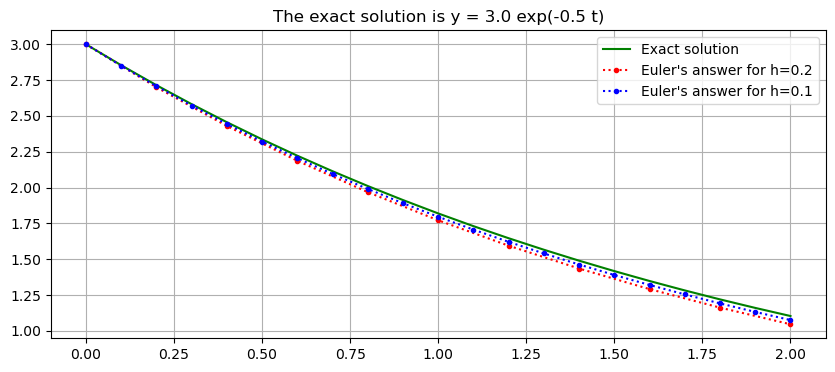

In [8]:
# You could experiment by changing these values here.
k = -0.5
u_0 = 3.0
a = 0.0
b = 2.0

(t, U) = eulermethod(f2, a, b, u_0, n)
(t10, U10) = eulermethod(f2, a, b, u_0, 10)
(t20, U20) = eulermethod(f2, a, b, u_0, 20)
t = t20
u = u2.(t, a, u_0, k)

figure(figsize=[10,4])
title("The exact solution is y = $u_0 exp($k t)")
plot(t, u, "g", label="Exact solution")
plot(t10, U10, ".:r", label="Euler's answer for h=$(approx4((b-a)/10))")
plot(t20, U20, ".:b", label="Euler's answer for h=$(approx4((b-a)/20))")
legend()
grid(true)

### Solving for {prf:ref}`ode-nonlinear`: solutions that blow up

In [9]:
f3(t, u) = u^2
# The solution is u(t) = 1/((a + 1/u_0) - t), = 1/(T-t) with T = a + 1/u_0
u3(t, a, u_0) = 1.0 / ((a + 1.0/u_0) - t);

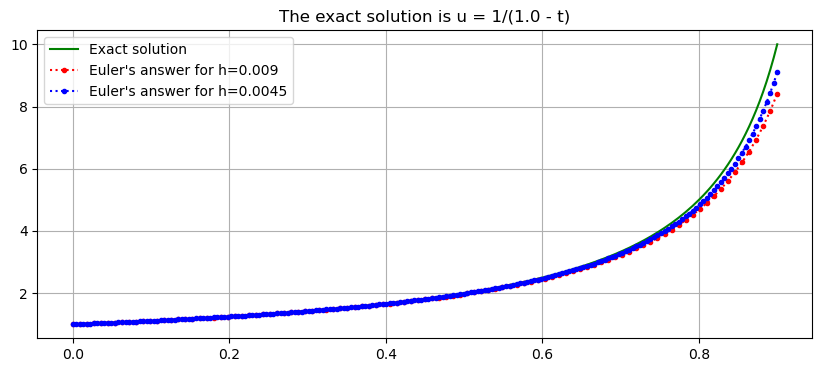

In [10]:
a = 0.0
b = 0.9
u_0 = 1.0

(t100, U100) = eulermethod(f3, a, b, u_0, 100)
(t200, U200) = eulermethod(f3, a, b, u_0, 200)
t = t200
u = u3.(t, a, u_0)

T = a + 1/u_0

figure(figsize=[10,4])
title("The exact solution is u = 1/($T - t)")
plot(t, u, "g", label="Exact solution")
plot(t100, U100, ".:r", label="Euler's answer for h=$(approx4((b-a)/100))")
plot(t200, U200, ".:b", label="Euler's answer for h=$(approx4((b-a)/200))")
legend()
grid(true)

There is clearly a problem when $t$ reaches 1; let us explore that:

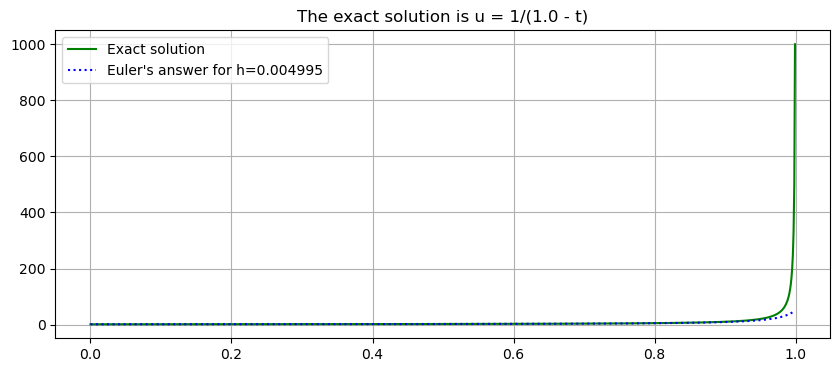

In [11]:
a = 0.0
b = 0.999
u_0 = 1.0
n = 200

(t, U) = eulermethod(f3, a, b, u_0, n)
# More t values are needed to get a good graph of the exact solution near the vertical asymptote:
tplot = range(a, b, 1000)
u = u3.(tplot, a, u_0)
T = a + 1/u_0

figure(figsize=[10,4])
title("The exact solution is u = 1/($T - t)")
plot(tplot, u, "g", label="Exact solution")
plot(t, U, ":b", label="Euler's answer for h=$(approx4((b-a)/n))")
legend()
grid(true)

Clearly Euler's method can never produce the vertical asymptote.

The best we can do is improve accuracy by using more, smaller time steps:

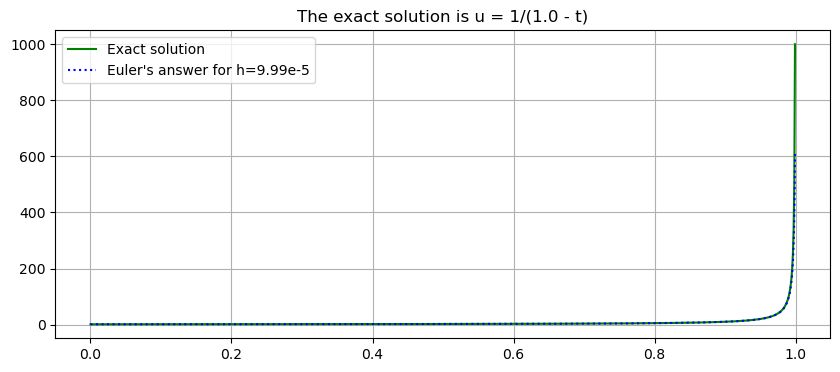

In [12]:
b= 0.999
n = 10_000;  # Julia note: underscores can be used in numbers for readability, like commas (or spaces in some countries)

(t, U) = eulermethod(f3, a, b, u_0, n)
tplot = range(a, b, 1000)
u = u3.(tplot, a, u_0)
T = a + 1/u_0

figure(figsize=[10,4])
title("The exact solution is u = 1/($T - t)")
plot(tplot, u, "g", label="Exact solution")
plot(t, U, ":b", label="Euler's answer for h=$(approx4((b-a)/n))")
legend()
grid(true)

### Solving for Solving for {prf:ref}`ode-stiff`, a stiff ODE

In [13]:
f4(t, u) = -sin(t) - k*(u - cos(t));
# The parameter k may be defined later, so long as that is done before this function is used.
# The general solution is u(t) = u(t; a, u_0) = cos t + (u_0 - cos(a)) e^(k (a-t))
u4(t, a, u_0, k) = cos(t) + (u_0 - cos(a)) * exp(k*(a-t));

With enough steps (small enough step size $h$), all is well:

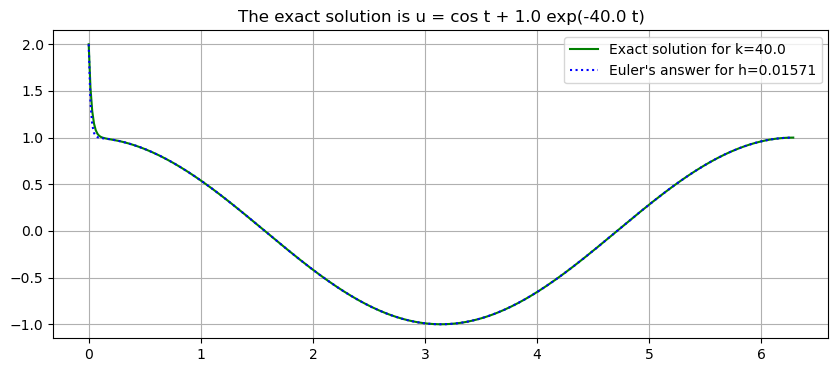

In [14]:
a = 0.0
b = 2pi  # One period
u_0 = 2.0
k = 40.0
n = 400

(t, U) = eulermethod(f4, a, b, u_0, n)
u = u4.(t, a, u_0, k)

figure(figsize=[10,4])
title("The exact solution is u = cos t + $(u_0-1) exp(-$k t)")
plot(t, u, "g", label="Exact solution for k=$k")
plot(t, U, ":b", label="Euler's answer for h=$(approx4((b-a)/n))")
legend()
grid(true);

However, with large steps (still small enough to handle the $\cos t$ part),
there is a catastrophic failure, with growing oscillations.

As we will see, these are a characteristic feature of *instability*.

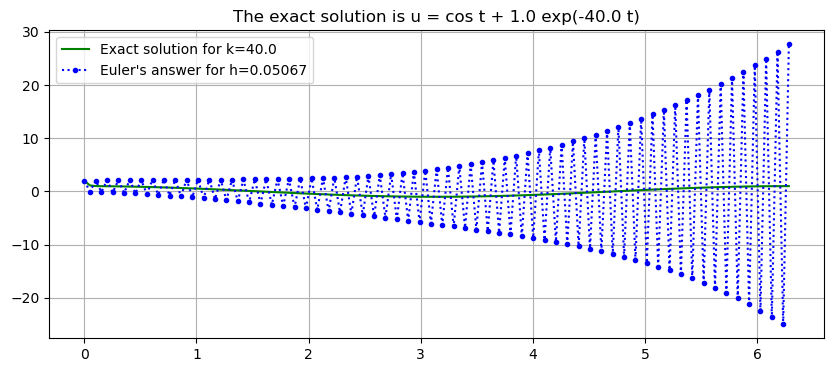

In [15]:
n = 124

(t, U) = eulermethod(f4, a, b, u_0, n)
u = u4.(t, a, u_0, k)

figure(figsize=[10,4])
title("The exact solution is u = cos t + $(u_0-1) exp(-$k t)")
plot(t, u, "g", label="Exact solution for k=$k")
plot(t, U, ".:b", label="Euler's answer for h=$(approx4((b-a)/n))")
legend()
grid(true);

To show that the $k$ part is the problem, reduce $k$ while leaving the rest unchanged:

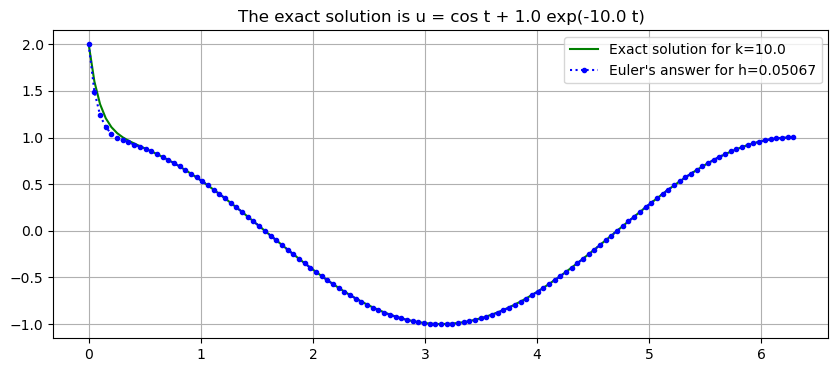

In [16]:
k = 10.0

(t, U) = eulermethod(f4, a, b, u_0, n)
u = u4.(t, a, u_0, k)

figure(figsize=[10,4])
title("The exact solution is u = cos t + $(u_0-1) exp(-$k t)")
plot(t, u, "g", label="Exact solution for k=$k")
plot(t, U, ".:b", label="Euler's answer for h=$(approx4((b-a)/n))")
legend()
grid(true);

### Variable Time Step Sizes $h_i$ (just a preview)

It is sometime useful to adjust the time step size; for example reducing it when the derivative is larger,
(as happens in Example 3 above).
This gives a slight variant, now expressed in pseudo-code:

Input: $f$, $a$, $b$, $n$ <br>
$t_0 = a$ <br>
$U_0 = u_0$ <br>
for i from 1 to n <br>
$\quad$ Choose $h_i$ somehow <br>
$\quad t_{i} = t_{i-1} + h_i$ <br>
$\quad U_{i} = U_{i-1} + h_i f(t_{i-1}, U_{i-1})$ <br>
end

In a later section, we will see how to estimate errors within an algorithm,
and then how to use such error estimates to guide the choice of step size.

### Error Analysis for the Canonical Test Case, $u' = k u$.

A great amount of intuition about numerical methods for solving ODE IVPs comes from that "simplest nontrivial example", number 2 above.
We can solve it with constant step size $h$, and thus study its errors and accuracy.
The recursion relation is now

$$U_{i} = U_{i-1} + h k U_{i-1} = U_{i-1} (1 + hk),$$

with solution

$$U_i = u_0 (1 + hk)^i$$

For comparison, the exact solution of this ODE IVP is

$$u(t_i) = u_0 e^{k(t_i - a)} = u_0 e^{k ih} = u_0 (e^{kh})^i$$

So each is a geometric series: the difference is that the *growth factor* is $G = (1 + hk)$ for Euler's method,
vs $g = e^{kh} = 1 + hk + (hk)^2/2 + \cdots = 1 + hk + O(h^2)$ for the ODE.

Ths deviation at each time step is $O(h^2)$, suggesting that by the end $t=b$, at step $n$, the error will be
$O(n h^2) = O\left(\displaystyle\frac{b-a}{h} h^2\right) = O(h)$.

This is in fact what happens, but to verify that, we must deal with the challenge that once an error enters at one step, it is potentially amplified at each subsequent step, so the errors introduced at each step do not simply get summed like they did with definite integrals.

### Global Error and Local (Truncation) Error

Ultimately, the error we need to understand is the **global error**: at step $i$,

$$ E_i = u(t_i) - U_i $$

We will approach this by first considering the new error added at each step, the **local truncation error** (or **discretization error**).

At the first step this is the same as above:

$$ e_1 = u(t_1) - U_1 = u(a+h) - U_1 $$

However at later steps we compare the results $U_{i+1}$ to what the solution would be if it were exact at the start of that step: that is, if $U_i$ were exact.

Using the notation $u(t; t_i, U_i)$ introduced <a href="#IVP_notation">above</a> for the solution of the ODE with initial condition $u(t_i) = U_i$, the **location truncation error** at step $i$ is the discrepancy at time $t_{i+1}$ between what Euler's method and the exact solution give when both start at that point $(t_i, U_i)$:

$$ e_i = u(t; t_i, U_i) - U_{i+1} $$

### Error propagation in $u' = k u$, $k \geq 0$.

After one step, $E_1 = u(t_1) - U_1 = e_1$.

At step 2,

$$ E_2 = u(t_2) - U_2 = (u(t_2) - u(t_2, t_1, U_1) + (u(t_2, t_1, U_1) - U_2)
= (u(t_2) - u(t_2, t_1, U_1) + e_2 $$

The first term is the difference at $t=t_2$ of two solutions with values at $t = t_1$ being $u(t_1)$ and $U_1$ respectively. As the ODE is linear and homogeneous, this is the solution of the same ODE with value at $t=t_1$ being $u(t_1) - U_1$, which is $e_1$:
that solution is $e_1 e^{y(t - t_1}$, so at $t=t_2$ it is $e_1 e^{kh}$.
Thus the global error after two steps is

$$ E_2 = e_2 + (e^{kh})e_1: $$

the error from the previous step has been amplified by the growth factor $g = e^{kh}$:

$$ E_2 = e_2 + g e_1: $$

This continues, so that

$$ E_3 = e_3 + g E_1 = e_3 + g (e_2 + g e_1) = e_3 + ge_2 + g^2 e_1 $$

and so on, leading to

$$ E_i = e_i + g e_{i-1} + g^2 e_{i-2} + \cdots + g^{i-1} e_{1} $$.

### Bounding the local truncation errors ...

To get a bound on the global error from the formula above, we first need a bound on the local truncation errors $e_i$.

Taylor's theorem gives $e^{kh} = 1 + kh + e^{k \xi} (kh)^2/2$, $0 < \xi < k h$, so

$$
e_i = U_i e^{kh} - U_i (1 + kh) = U_i (e^{k \xi} h^2/2)
$$

and thus

$$|e_i| \leq |U_i| \frac{e^{kh}}{2} h^2$$

Also, since $1 + kh < e^{kh}$,
$|U_i| < |u(t_i)| = |u_0| e^{k(t_i - a)},$
and we only need this to the beginning of the last step, $i \leq n-1$, for which

$$
|U_i| < |u_0| e^{k(b - h - a)}
$$

Thus

$$
|e_i| \leq \frac{|u_0| e^{k(b - h - a)} e^{kh}}{2} h^2 = \frac{|u_0 e^{k(b - a)}|}{2} h^2
$$

That is,

$$ |e_i| \leq C h^2 \text{ where } C := \frac{|u_0 e^{k(b - a)}|}{2} $$

### ... and using this to complete the bound on the global truncation error

Using this bound on the local errors $e_i$ in the above sum for the global error $E_i$,

$$ | E_i | \leq C h^2 (1 + g + \cdots g^{i-1}) = C \frac{g^i - 1}{g-1} h^2 $$

Since $g^i = e^{k h i} = e^{k (t_i - a)}$ and the denominator $g - 1 = e^{kh} - 1 > k h$,
we get

$$
| E_i | \leq  C \frac{e^{k (t_i - a)} - 1}{k h} h^2
\leq \frac{|u_0 e^{k(b - a)}|}{2} \frac{e^{k (t_i - a)} - 1}{k} h, = O(h)
$$

Note that this global error formula is bulilt from three factors:

- The first is the constant
$\displaystyle \frac{|u_0 e^{k(b - a)}|}{2}$
which is roughly half of the maximum value of the exact solution over the interval $[a, b]$.

- The second
$\displaystyle \frac{e^{k (t_i - a)} - 1}{k}$
depends on $t$, and 

- The third is $h$, showing the overall order of accuracy: the overall absolute error is $O(h)$, so first order.

### A more general error bound

A very similar result applies to the solution $u(t; a, u_0)$ of the more general initial value problem

$$ \frac{du}{dt} = f(t, u), \quad u(a) = u_0 $$

so long as the function $f$ is "somewhat well-behaved" in that it satisfies a so-called *Lipschitz Condition*:
that there is some constant $K$ such that

$$ \left| \frac{\partial F}{\partial u}(t, u) \right| \leq K  $$

for the relevant time values $a \leq t \leq b$.

(**Aside:** As you might have seen in a course on differential equations, such a Lipschitz condition is necessary to even guarantee that the initial value problem has a unique solution, so it is a quite reasonable requirement.)

Then this constant $K$ plays the part of the exponential growth factor $k$ above:

first one shows that the local trunction error is bounded by

$$ |e_i| \leq C h^2 \text{ where now } C := \frac{|u_0 e^{K(b - a)}|}{2}; $$

then calculating as above bounds the global truncation error with

$$
| E_i | \leq \frac{|u_0 e^{K(b - a)}|}{2} \frac{e^{K (t_i - a)} - 1}{k} h, = O(h)
$$

### There is much room for improvement

As with definite integrals, this is not very impressive, so in the next section on
{doc}`ODE-IVP-2-Runge-Kutta`
we will explore several widely used methods that improve to second order and then fourth order accuracy.
Later, we will see how to get even higher orders.

But first, we can illustrate how this exponential growth of errors looks in some examples, and coapr the the better behaved errors in definite integrals.

This will be done by looking at the effect of a small change in the initial value, to simulate an error that arises there.

### Error propagation for {prf:ref}`ode-integration`

In [17]:
a = 0.0
b = 2pi
u_0 = 1.0  # Original value
n = 100

(t, U) = eulermethod(f1, a, b, u_0, n);

But now "perturb" the initial value in all cases by this much:

In [18]:
delta_u_0 = 0.1
(t, U_perturbed) = eulermethod(f1, a, b, u_0+delta_u_0, n)
u = u1.(t, a, u_0);

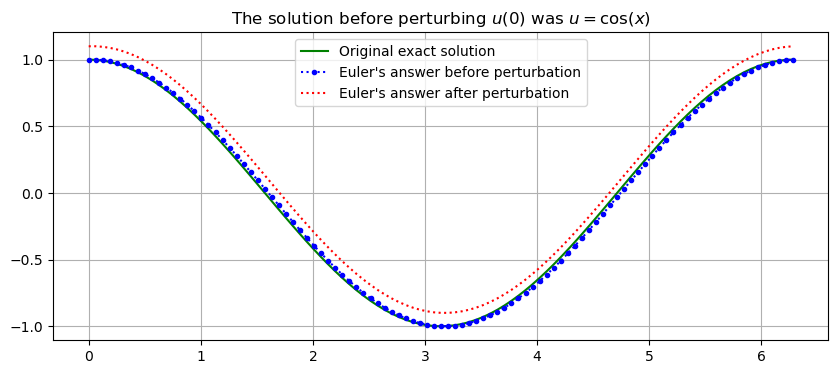

In [19]:
figure(figsize=[10,4])
title(L"The solution before perturbing $u(0)$ was $u = \cos(x)$")
plot(t, u, "g", label="Original exact solution")
plot(t, U, ".:b", label="Euler's answer before perturbation")
plot(t, U_perturbed, "r:", label="Euler's answer after perturbation")
legend()
grid(true)

This just shifts all the $u$ values up by the perturbation of $u_0$.

### Error propagation for {prf:ref}`ode-simplest-genuine`

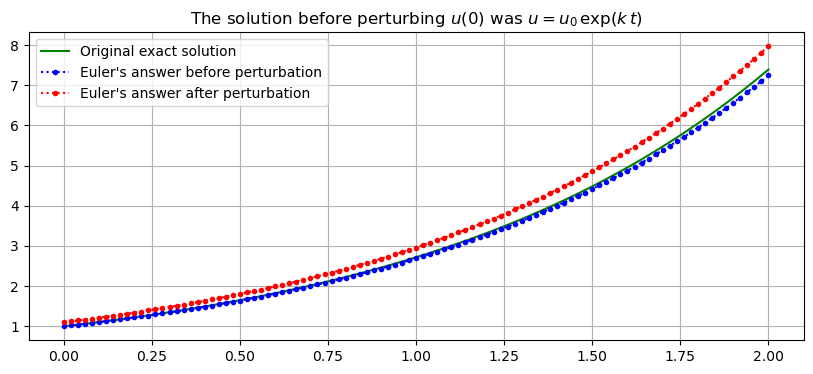

In [20]:
k = 1.0
a = 0.0
b = 2.0
u_0 = 1.0  # Original value
delta_u_0 = 0.1
n = 100

(t, U) = eulermethod(f2, a, b, u_0, n)
(t, U_perturbed) = eulermethod(f2, a, b, u_0 + delta_u_0, n)
u = u2.(t, a, u_0, k)

figure(figsize=[10,4])
title(L"The solution before perturbing $u(0)$ was $u = {u_0} \, \exp({k} \, t)$")
plot(t, u, "g", label="Original exact solution")
plot(t, U, ".:b", label="Euler's answer before perturbation")
plot(t, U_perturbed, ".:r", label="Euler's answer after perturbation")
legend()
grid(true)

Graphing the error shows its exponential growth:

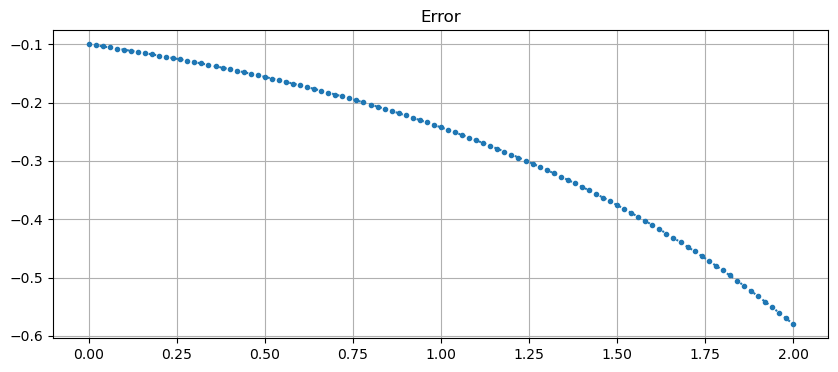

In [21]:
figure(figsize=[10,4])
title("Error")
plot(t, u - U_perturbed, ".:")
grid(true)

---
## Exercises

<a name="exercise-1"></a>
### Exercise 1

Show that for the integration case $f(t, u) = f(t)$,
[Euler's Method](#eulers-method)
is the same as the Composite Left-hand Endpoint Rule,
as in the section {doc}`integrals-2-composite-rules`